In [1]:
import fairx

from fairx.dataset import BaseDataClass
from fairx.dataset import CustomDataClass
from fairx.metrics import FairnessUtils, DataUtilsMetrics
from fairx.utils.plots import *

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
from sklearn.preprocessing import OrdinalEncoder

In [3]:
dataset_name = 'Adult-Income'
sensitive_attr = 'sex'
data_path = 'sample_fake_data/TabFairGAN-Adult-Income-sex.csv'

In [4]:
ori_data_module = BaseDataClass(dataset_name, sensitive_attr, attach_target = False)

Data loading complete
Target attribute: class


In [5]:
ori_data_module.data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [6]:
fake_data_module = CustomDataClass(data_path, sensitive_attr, ori_data_module.target_attr)

Data loading complete


In [7]:
fake_data_module.data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,38.0,13492.00,13.0,0.0,0.0,60.0,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
1,29.0,1484705.00,9.0,0.0,0.0,25.0,Federal-gov,HS-grad,Never-married,Other-service,Not-in-family,White,Female,United-States
2,66.0,182110.89,11.0,0.0,0.0,40.0,State-gov,Assoc-voc,Widowed,Exec-managerial,Unmarried,White,Female,United-States
3,38.0,202998.31,9.0,0.0,0.0,50.0,Private,HS-grad,Never-married,Handlers-cleaners,Not-in-family,White,Female,United-States
4,39.0,1484705.00,9.0,0.0,0.0,40.0,Local-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,Male,El-Salvador


In [8]:
fake_data_module.data.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [9]:
def prepare_for_tsne(df):

    enc = OrdinalEncoder()

    for col in df.columns:

        df[[col]] = enc.fit_transform(df[[col]])
    
    return enc, df.values

In [10]:
_, tf_ori = prepare_for_tsne(ori_data_module.data)

_, tf_fake = prepare_for_tsne(fake_data_module.data)

In [11]:
tf_ori.shape

(48842, 14)

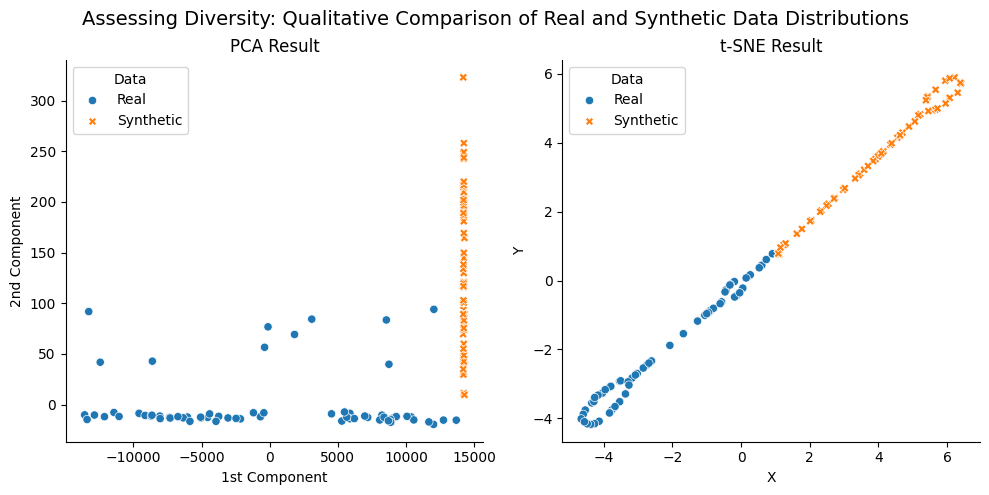

In [12]:
visualize_tsne(tf_ori[:64], tf_fake[:64])